In [10]:
import torch
import torchvision

print(f"Torch {torch.__version__} TorchVision {torchvision.__version__}")

Torch 1.12.1 TorchVision 0.13.1


In [11]:
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights

In [12]:
device = torch.device("cpu")
weights = EfficientNet_V2_S_Weights.IMAGENET1K_V1
efficientNetModel = efficientnet_v2_s(weights=weights)

efficientNetModel.eval().to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [13]:
preprocess = weights.transforms()

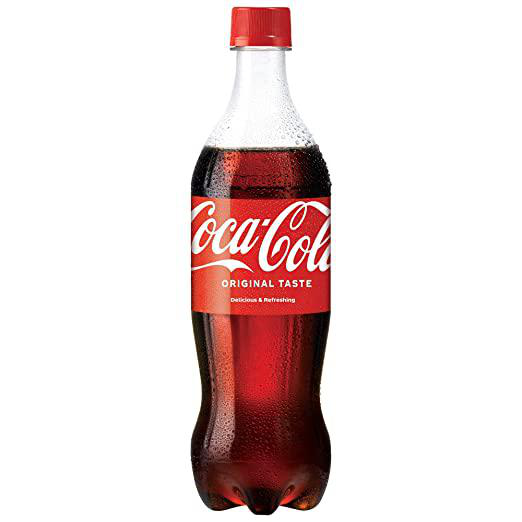

In [14]:
from PIL import Image

img = Image.open("Targets/1.jpg")
img

In [15]:
img_transformed = preprocess(img).unsqueeze(0)
img_transformed.dim()

4

In [16]:
prediction = efficientNetModel(img_transformed).squeeze(0).softmax(0)
prediction

tensor([2.1615e-04, 3.0138e-04, 2.4142e-04, 2.8173e-04, 3.3954e-04, 2.8877e-04,
        2.4514e-04, 3.8227e-04, 1.8717e-04, 2.9778e-04, 1.2843e-04, 1.2017e-04,
        2.3918e-04, 2.2400e-04, 1.9036e-04, 1.4740e-04, 1.9753e-04, 1.4881e-04,
        1.6912e-04, 1.4098e-04, 2.1553e-04, 2.3044e-04, 1.5727e-04, 2.2521e-04,
        2.1559e-04, 1.5379e-04, 1.4958e-04, 2.6258e-04, 1.6542e-04, 1.4071e-04,
        1.1066e-04, 1.7980e-04, 1.6355e-04, 2.4004e-04, 3.0654e-04, 1.8811e-04,
        2.5107e-04, 1.6852e-04, 2.4989e-04, 2.0853e-04, 2.9394e-04, 1.1989e-04,
        2.7247e-04, 2.1060e-04, 2.0527e-04, 1.7504e-04, 2.8377e-04, 4.0027e-04,
        2.4582e-04, 3.4223e-04, 2.4020e-04, 2.7231e-04, 1.6027e-04, 1.7279e-04,
        2.0199e-04, 1.8677e-04, 2.0473e-04, 1.5478e-04, 1.3753e-04, 1.8252e-04,
        1.6905e-04, 1.9408e-04, 1.3545e-04, 2.3401e-04, 2.0809e-04, 2.7068e-04,
        2.0608e-04, 2.0299e-04, 1.7808e-04, 2.0219e-04, 2.0266e-04, 2.4032e-04,
        1.6873e-04, 2.6995e-04, 1.8375e-

In [17]:
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]

print(f"{class_id}-{category_name}-{score}")

737-pop bottle-0.7587802410125732
